In [72]:
#'Aanand_19_01.csv'  ,         88%
#'Abhijeet_6205876348.csv'
#,'Aanand_19_02.csv'           95%
#'Deepanshu_21_1.csv', 
#'Achal_19_01.csv', 
#'Adit_18_02.csv', 
#'Deepanshu_21_02.csv', 
#'Mantavya_20_01.csv',
# 'Mantavya_20_02.csv',
# 'Pritesh_22_01.csv', 
#'Pritesh_22_02.csv', 
#'Rishab_20_01.csv', 
#'Rishab_20_02.csv']


In [73]:
import mne
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

path = r'Rishab_20_02.csv'
sfreq = 120
#ch_names = ['Fp2', 'F4', 'F8', 'T8', 'Fp1', 'F3', 'F7', 'T7', 'Cz',
#            'C4', 'P4', 'O2', 'Pz', 'C3', 'P3', 'O1','stim']
df = pd.read_csv(path)
df.head()

timestamps            Fp1           Fp2            C3            C4  \
0  1.709543e+09  178718.021955  38569.902011  40764.753910  46739.241092   
1  1.709543e+09  357204.166914  76955.536241  81344.703596  93314.062752   
2  1.709543e+09  357856.748445  76228.121069  80617.556646  92587.184022   
3  1.709543e+09  357234.475879  77185.267471  81573.093721  93528.371278   
4  1.709543e+09  357560.498424  76350.966257  80737.719624  92704.933012   

             P7            P8            O1            O2             F7  \
0  25140.616314  32659.787853  43190.275811  39324.541607  -55040.410762   
1  50092.941534  65138.660686  86205.805684  78465.217765 -108226.476100   
2  49388.325141  64412.586619  85486.437140  77731.633512 -108013.374569   
3  50327.232519  65364.100380  86431.915931  78692.937338 -108138.767855   
4  49506.744684  64537.041132  85613.707973  77858.770234 -108139.974849   

              F8             F3             F4             T7             T8  \
0  -56333.772103  -57943.902367  -54430.074028  -58144.129293  -63074.968824   
1 -111989.481686 -113603.903485 -107872.424468 -113996.176600 -124785.900090   
2 -112179.918549 -113821.967104 -107873.363241 -114199.085736 -124997.660517   
3 -112077.994594 -113703.145230 -107926.605097 -114094.613683 -124881.923185   
4 -112083.895455 -113717.629161 -107877.654776 -114092.065584 -124885.007725   

              P3             P4  stim  sfreq  
0  -60690.887057  -62581.442306   0.0    125  
1 -118921.919933 -124107.435239   0.0    125  
2 -119122.012749 -123853.564126   0.0    125  
3 -119017.004254 -124048.560744   0.0    125  
4 -119007.214189 -124000.146866   0.0    125

In [74]:
temp = df.drop('stim', axis=1)

In [75]:
df = temp.drop('sfreq', axis=1)

In [76]:
df.head()

timestamps            Fp1           Fp2            C3            C4  \
0  1.709543e+09  178718.021955  38569.902011  40764.753910  46739.241092   
1  1.709543e+09  357204.166914  76955.536241  81344.703596  93314.062752   
2  1.709543e+09  357856.748445  76228.121069  80617.556646  92587.184022   
3  1.709543e+09  357234.475879  77185.267471  81573.093721  93528.371278   
4  1.709543e+09  357560.498424  76350.966257  80737.719624  92704.933012   

             P7            P8            O1            O2             F7  \
0  25140.616314  32659.787853  43190.275811  39324.541607  -55040.410762   
1  50092.941534  65138.660686  86205.805684  78465.217765 -108226.476100   
2  49388.325141  64412.586619  85486.437140  77731.633512 -108013.374569   
3  50327.232519  65364.100380  86431.915931  78692.937338 -108138.767855   
4  49506.744684  64537.041132  85613.707973  77858.770234 -108139.974849   

              F8             F3             F4             T7             T8  \
0  -56333.772103  -57943.902367  -54430.074028  -58144.129293  -63074.968824   
1 -111989.481686 -113603.903485 -107872.424468 -113996.176600 -124785.900090   
2 -112179.918549 -113821.967104 -107873.363241 -114199.085736 -124997.660517   
3 -112077.994594 -113703.145230 -107926.605097 -114094.613683 -124881.923185   
4 -112083.895455 -113717.629161 -107877.654776 -114092.065584 -124885.007725   

              P3             P4  
0  -60690.887057  -62581.442306  
1 -118921.919933 -124107.435239  
2 -119122.012749 -123853.564126  
3 -119017.004254 -124048.560744  
4 -119007.214189 -124000.146866

In [77]:
eeg_data = df.iloc[:,1:18].values.T
eeg_data[:-1] = eeg_data[:-1] * (10*(-6))
eeg_data[:-1] = eeg_data[:-1] / 4

ch_names = ['Fp1',	'Fp2'	,'C3'	,'C4'	,'P7'	,'P8'	,'O1'	,'O2'	,'F7'	,'F8'	,'F3'	,'F4'	,'T7'	,'T8'	,'P3'	,'P4']
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = ( ["eeg" ]*16))
raw = mne.io.RawArray(eeg_data, info)
raw.set_eeg_reference()

raw.filter(l_freq = 1,h_freq = 30)

Creating RawArray with float64 data, n_channels=16, n_times=65728
    Range : 0 ... 65727 =      0.000 ...   547.725 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 397 samples (3.308 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.0s finished


<RawArray | 16 x 65728 (547.7 s), ~8.0 MB, data loaded>

In [78]:
# import mne
# from mne.channels import DigMontage

# # Define electrode positions
# positions = {
#     'Fp1': (-0.3268, 0.6235, 0.0351),  # Replace x_fp1, y_fp1, z_fp1 with actual coordinates
#     'Fp2': (0.3268, 0.6235, 0.0351),  # Replace x_fp2, y_fp2, z_fp2 with actual coordinates
#     'F7': (-0.873, 0.431, 0.032),  # Replace x_f7, y_f7, z_f7 with actual coordinates
#     'F3': (-0.514, 0.474, 0.034),  # Replace x_f3, y_f3, z_f3 with actual coordinates
#     'Fz': (0, 0.55, 0.035),  # Replace x_fz, y_fz, z_fz with actual coordinates
#     'F4': (0.514, 0.474, 0.034),  # Replace x_f4, y_f4, z_f4 with actual coordinates
#     'F8': (0.873, 0.431, 0.032),  # Replace x_f8, y_f8, z_f8 with actual coordinates
#     'T7': (-0.973, -0.041, 0.031),  # Replace x_t7, y_t7, z_t7 with actual coordinates
#     'C3': (-0.327, -0.103, 0.031),  # Replace x_c3, y_c3, z_c3 with actual coordinates
#     'Cz': (0, 0, 0.034),  # Replace x_cz, y_cz, z_cz with actual coordinates
#     'C4': (0.327, -0.103, 0.031),  # Replace x_c4, y_c4, z_c4 with actual coordinates
#     'T8': (0.973, -0.041, 0.031),  # Replace x_t8, y_t8, z_t8 with actual coordinates
#     'P7': (-0.7, -0.685, 0.032),  # Replace x_p7, y_p7, z_p7 with actual coordinates
#     'P3': (-0.273, -0.796, 0.034),  # Replace x_p3, y_p3, z_p3 with actual coordinates
#     'Pz': (0, -0.847, 0.034),  # Replace x_pz, y_pz, z_pz with actual coordinates
#     'P4': (0.273, -0.796, 0.034),  # Replace x_p4, y_p4, z_p4 with actual coordinates
#     # Add coordinates for other electrodes
# }

montage = 'standard_1020'
raw.set_montage(montage)


<RawArray | 16 x 65728 (547.7 s), ~8.1 MB, data loaded>

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 16 components
Fitting ICA took 2.3s.
Creating RawArray with float64 data, n_channels=16, n_times=65728
    Range : 0 ... 65727 =      0.000 ...   547.725 secs
Ready.


C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1291946124.py:7: RuntimeWarning: Using n_components=16 (resulting in n_components_=16) may lead to an unstable mixing matrix estimation because the ratio between the largest (12) and smallest (2.5e-28) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 15
  ica.fit(raw)


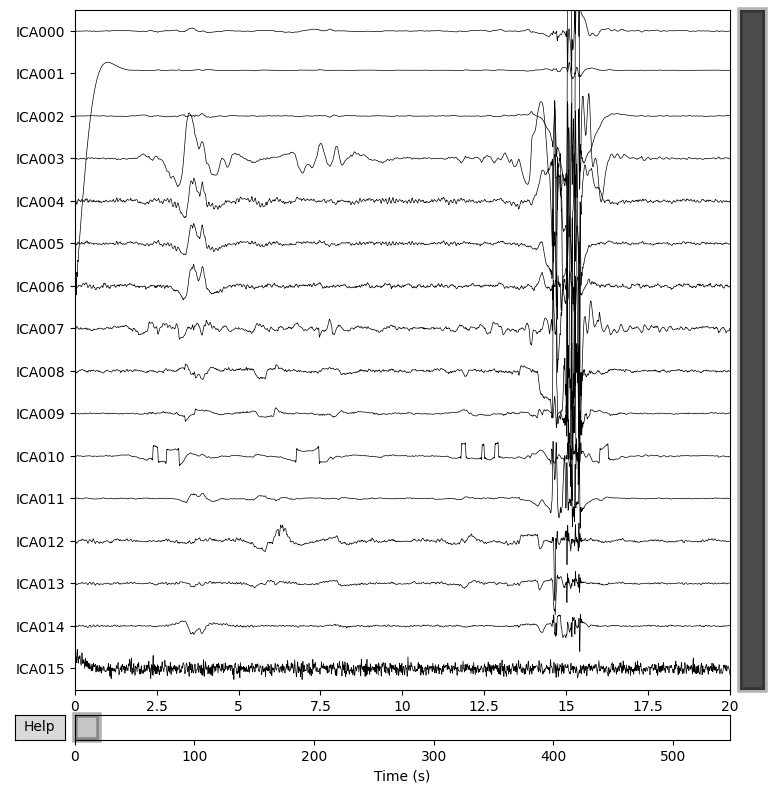

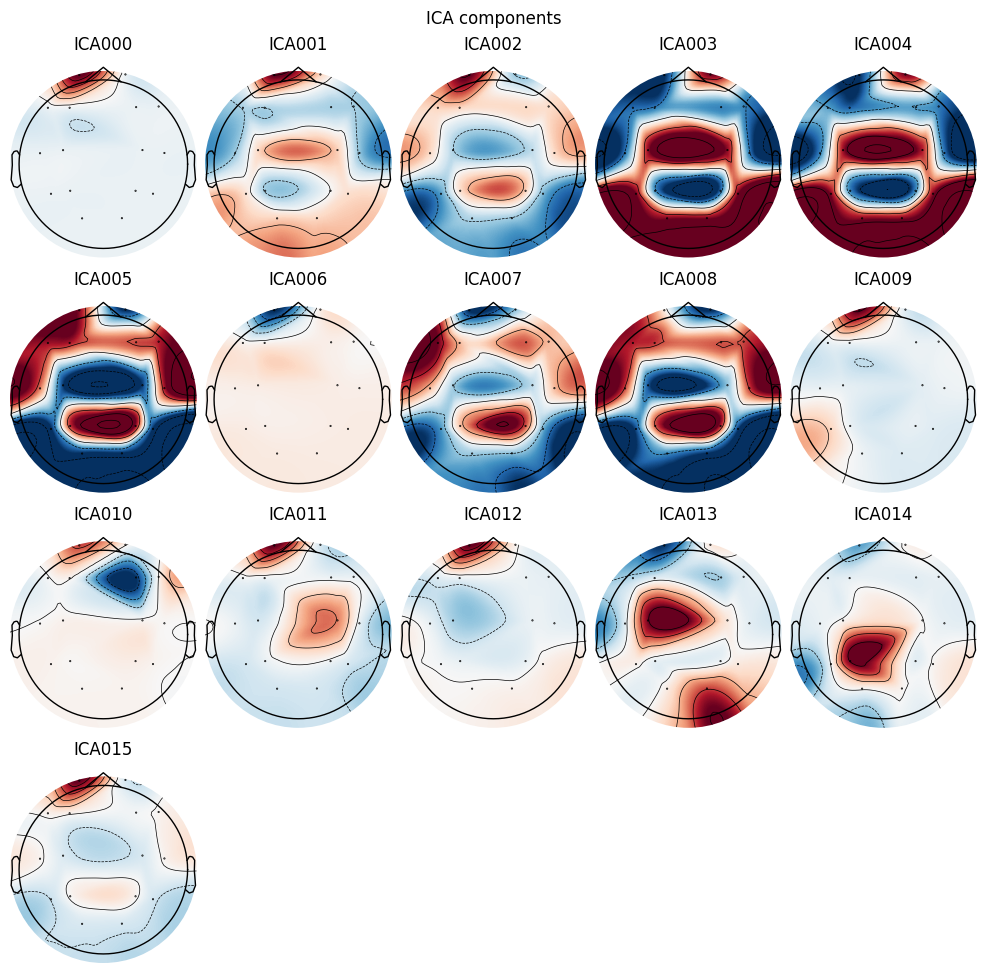

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
273 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
273 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
273 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
273 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
273 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
273 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
273 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
273 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
273 matching events found
No baseline correction applied
0 pro

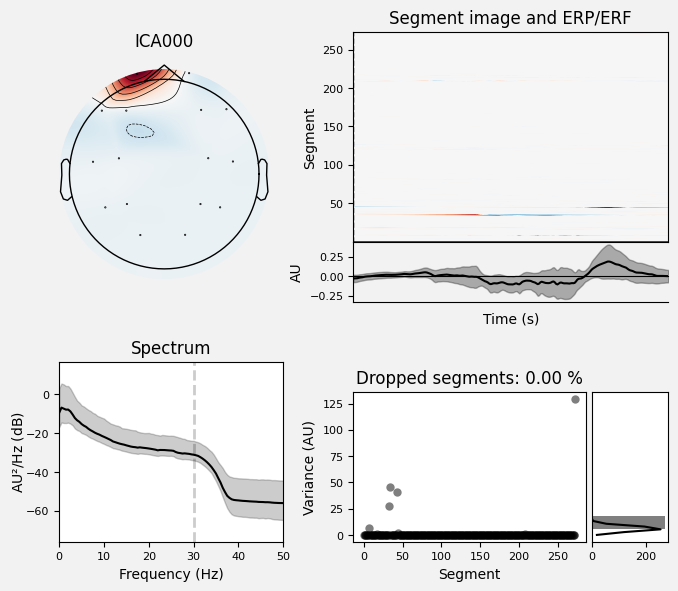

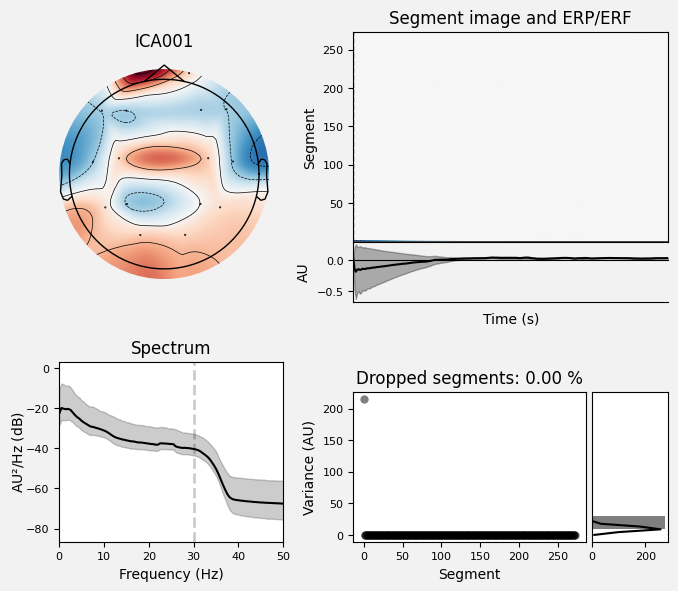

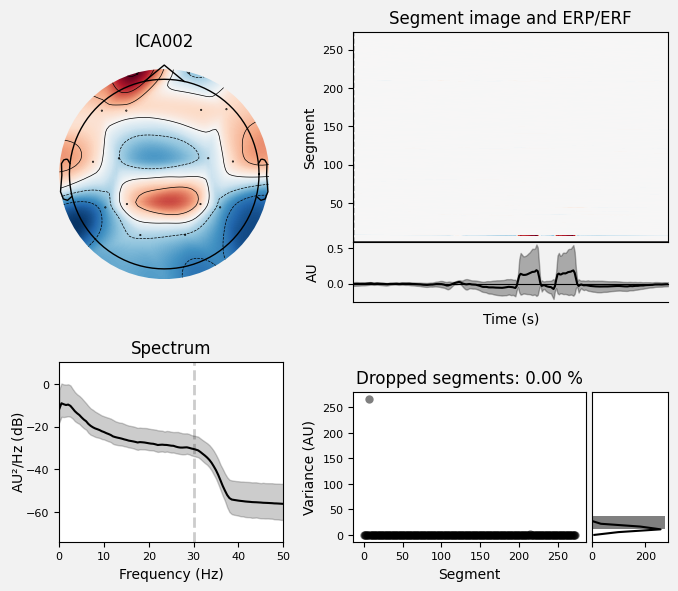

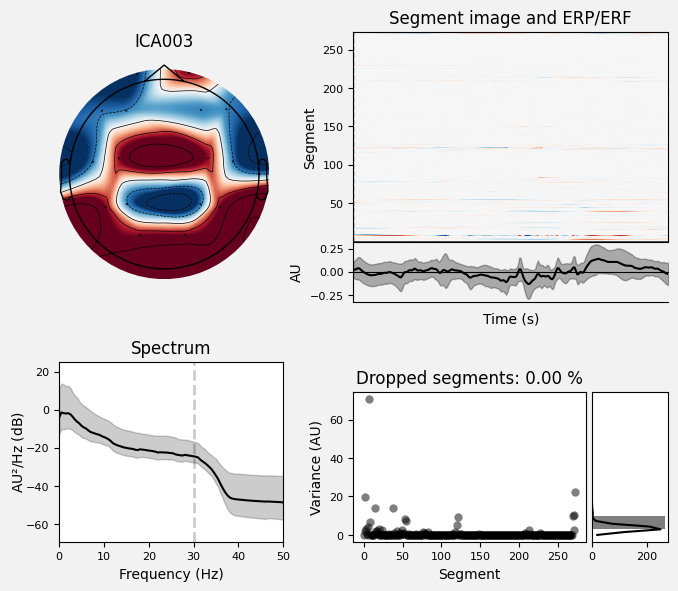

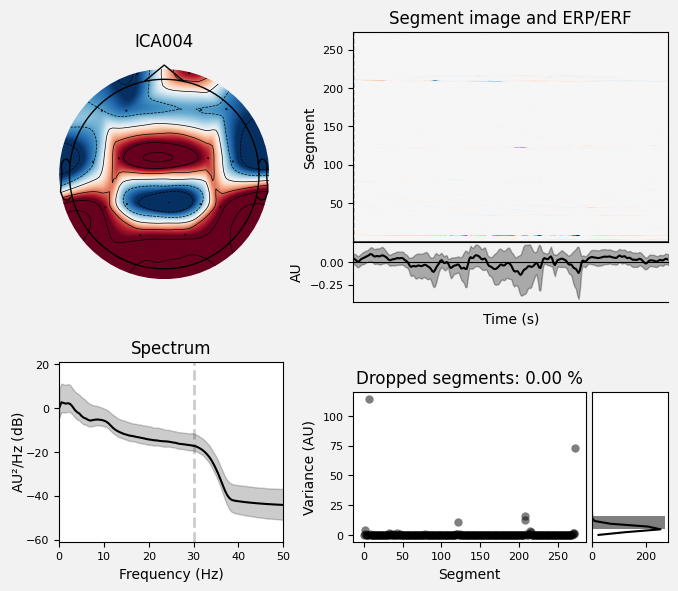

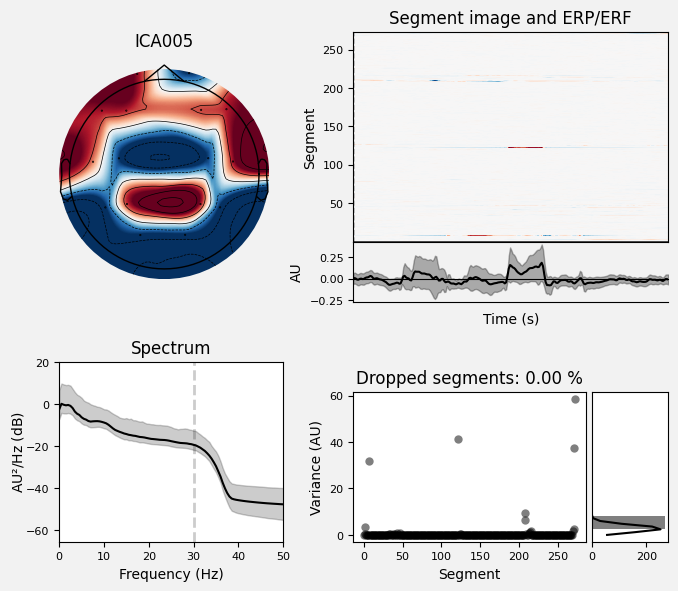

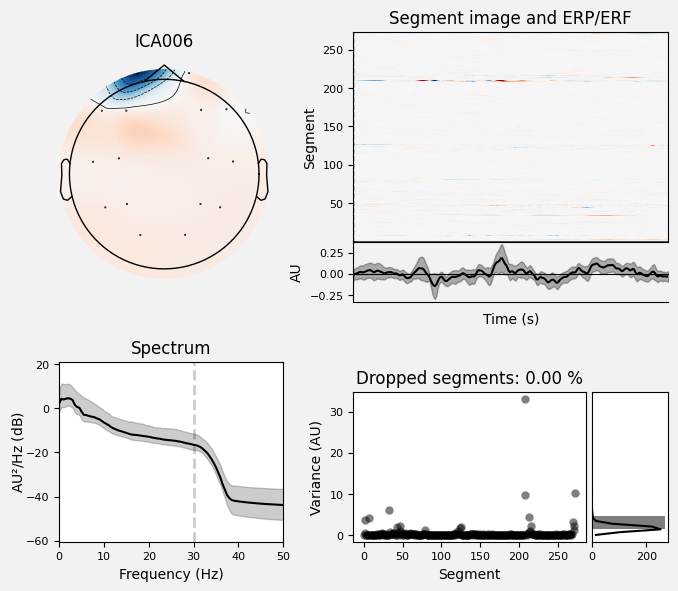

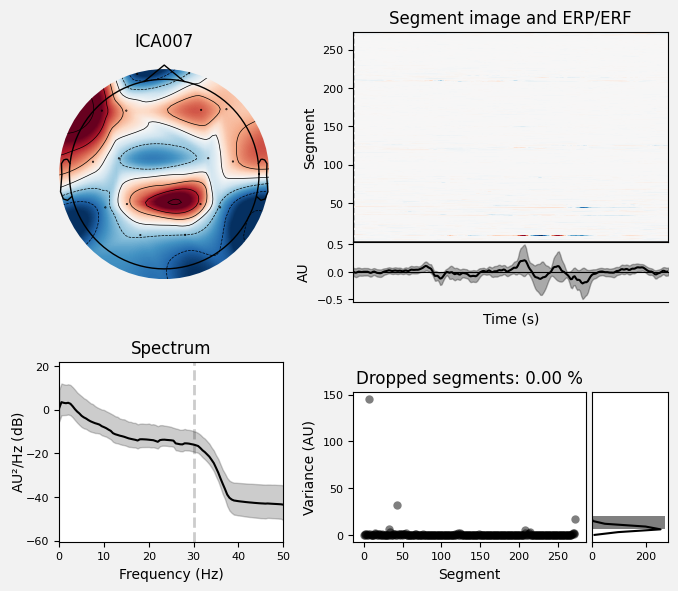

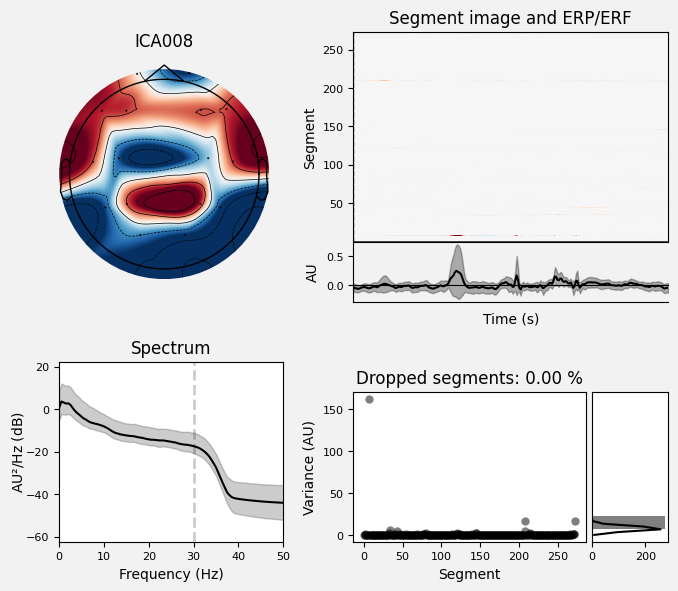

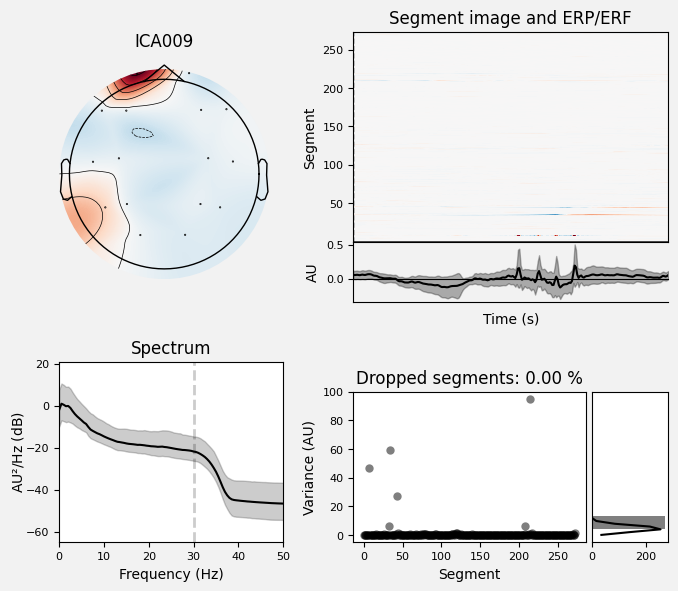

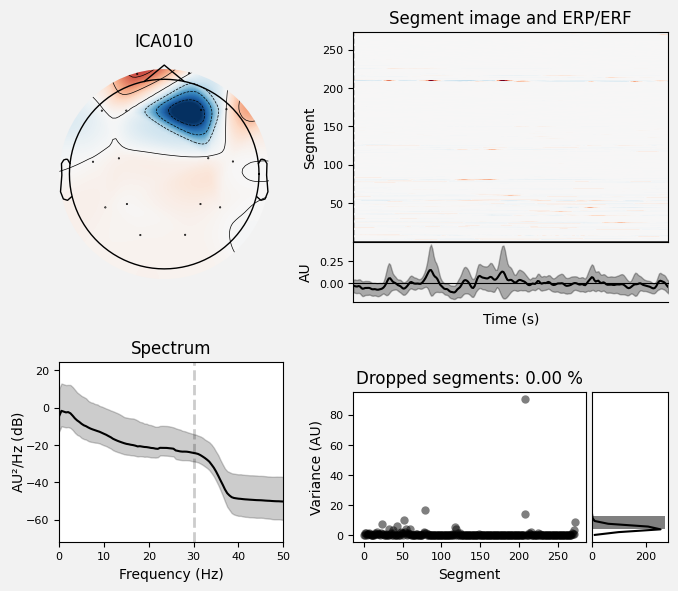

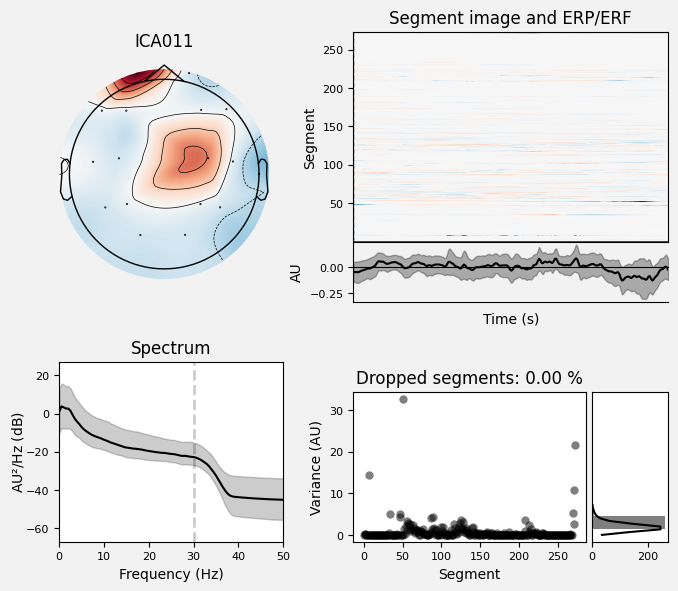

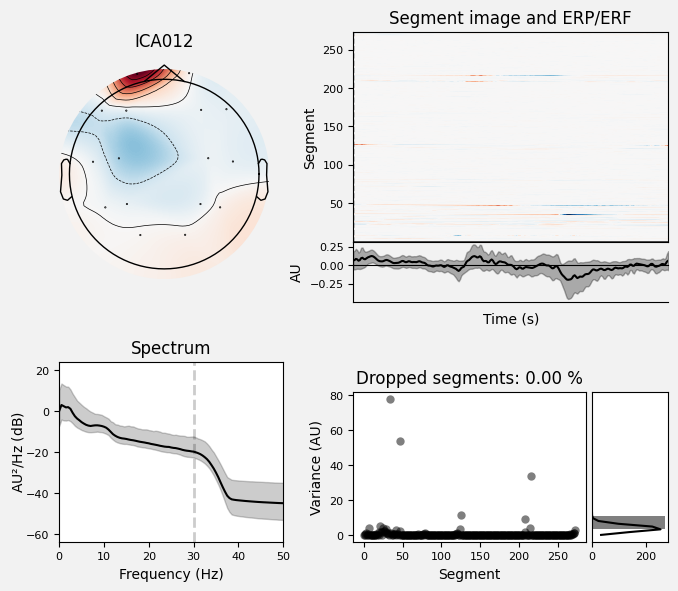

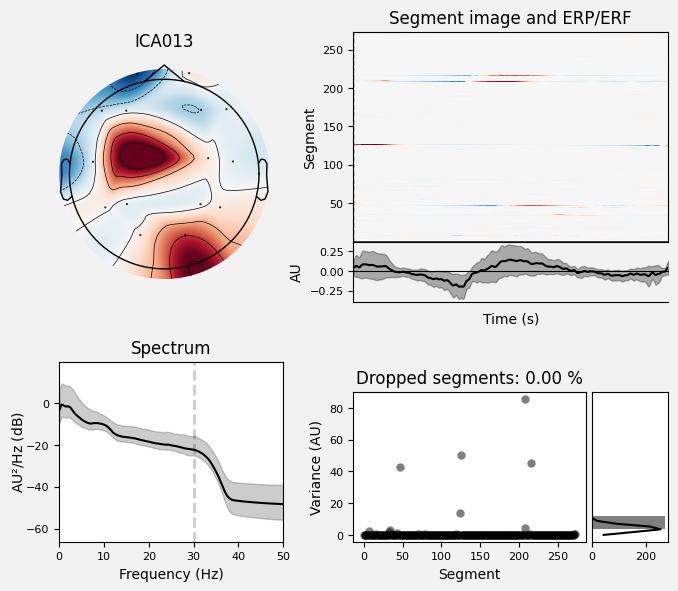

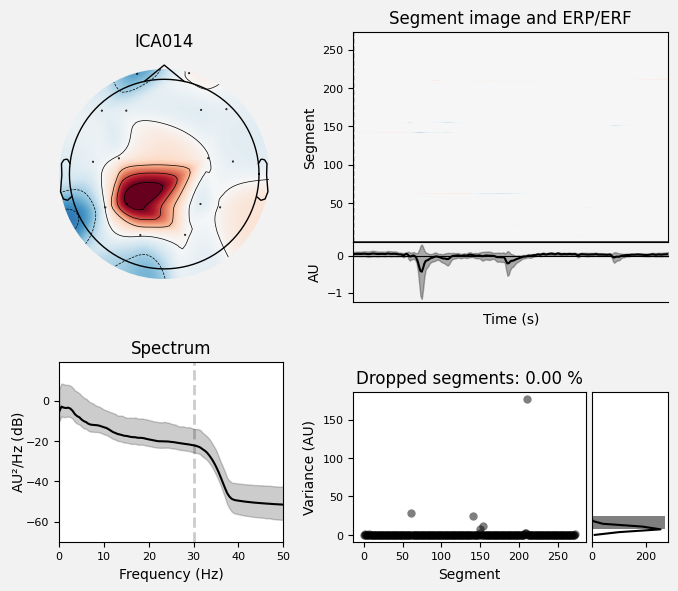

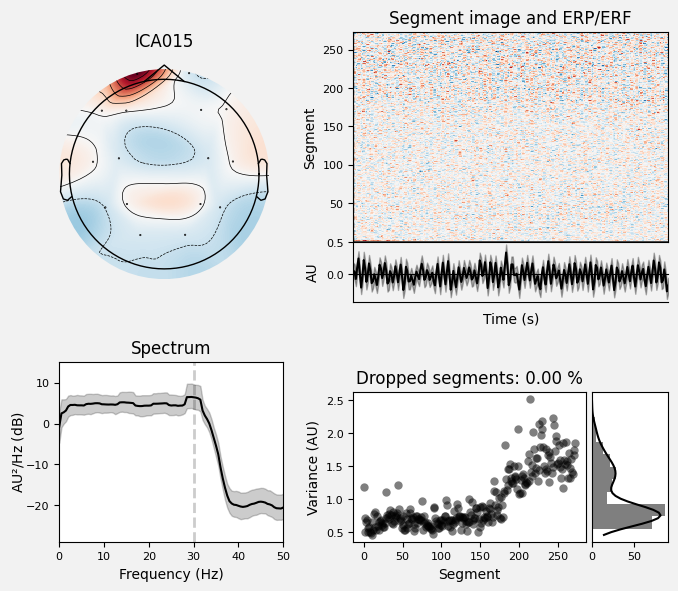

Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 0 ICA components
    Projecting back using 16 PCA components


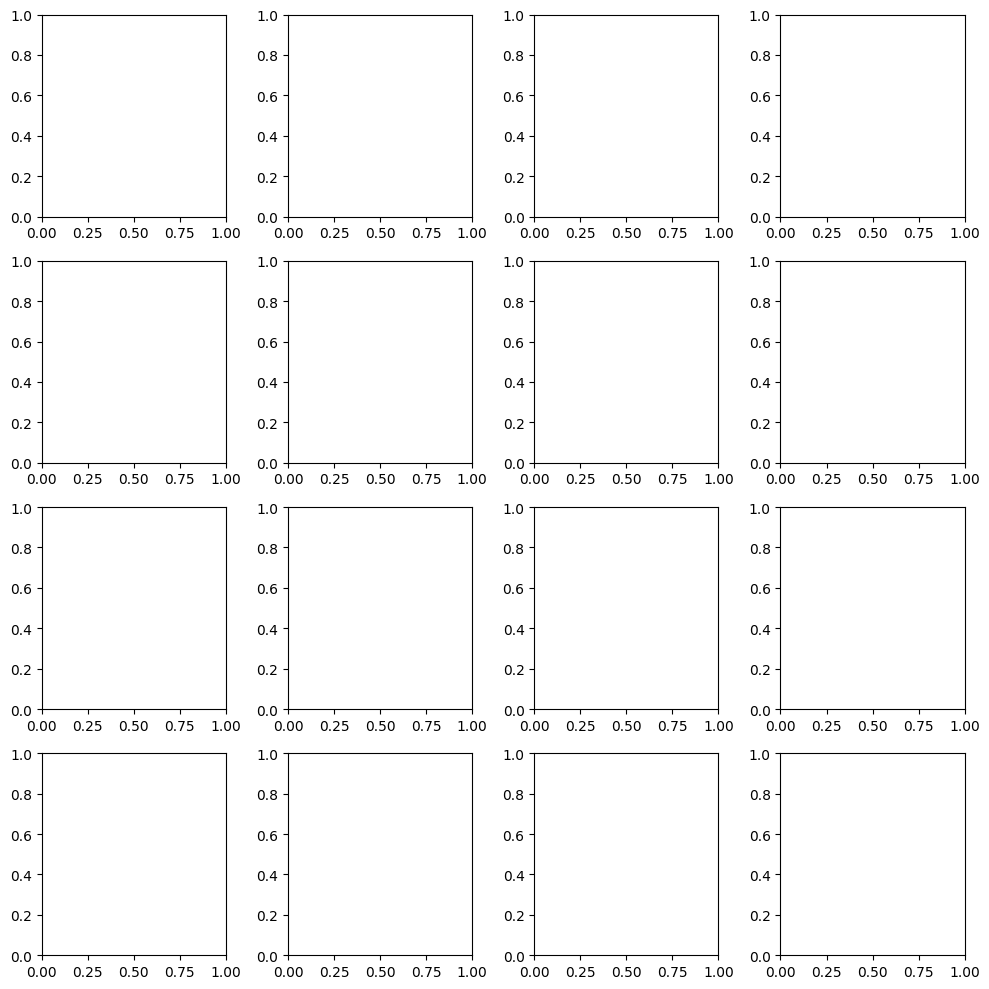

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
import mne

ica = ICA(n_components=16, random_state=97)
ica.fit(raw)

ica.plot_sources(inst=raw, picks=np.arange(16), show=True)

ica.plot_components(inst=raw, picks=np.arange(16), show=True)

ica.plot_properties(inst=raw, picks=np.arange(16), psd_args={'fmax': 50}, show=True)

plt.show()

raw_ica = ica.apply(raw)

fig, axes = plt.subplots(4, 4, figsize=(10, 10))

plt.tight_layout()
plt.show()


In [80]:
duration = 0.4

epochs=mne.make_fixed_length_epochs(raw_ica, duration = duration, overlap=0,preload=True)

Not setting metadata
1369 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 1369 events and 48 original time points ...


0 bad epochs dropped


In [81]:
epochs.drop_bad()  # This will drop bad epochs
num_epochs = len(epochs)
print("Total number of epochs created:", num_epochs)

Total number of epochs created: 1369


In [82]:
epochs.get_data()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1251544707.py:1: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  epochs.get_data()


array([[[-2.84188538e-02, -2.25301086e+06, -2.86976718e+06, ...,
         -8.59284817e+05, -8.28665445e+05, -7.98799316e+05],
        [-2.81397490e-03, -4.47582597e+05, -5.70058054e+05, ...,
         -1.71263650e+05, -1.64988126e+05, -1.58718106e+05],
        [-2.61462504e-03, -4.75762404e+05, -6.05937490e+05, ...,
         -1.82122740e+05, -1.75429318e+05, -1.68699160e+05],
        ...,
        [-7.84622898e-04,  8.35055688e+05,  1.06376891e+06, ...,
          3.19323321e+05,  3.07787652e+05,  2.96399239e+05],
        [-2.94214922e-04,  7.90346920e+05,  1.00679878e+06, ...,
          3.01844847e+05,  2.90895109e+05,  2.80156121e+05],
        [-4.84220800e-05, -1.07800929e+04, -1.37968280e+04, ...,
         -3.98654194e+03, -4.11448665e+03, -4.27400708e+03]],

       [[-7.69483794e+05, -7.40682784e+05, -7.12718467e+05, ...,
          1.06204037e+04,  1.71888142e+04,  2.32227315e+04],
        [-1.52704541e+05, -1.46943652e+05, -1.41169254e+05, ...,
          1.71075161e+03,  3.16650923e

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 48, using nperseg = 48
  warnings.warn('nperseg = {0:d} is greater than input length '


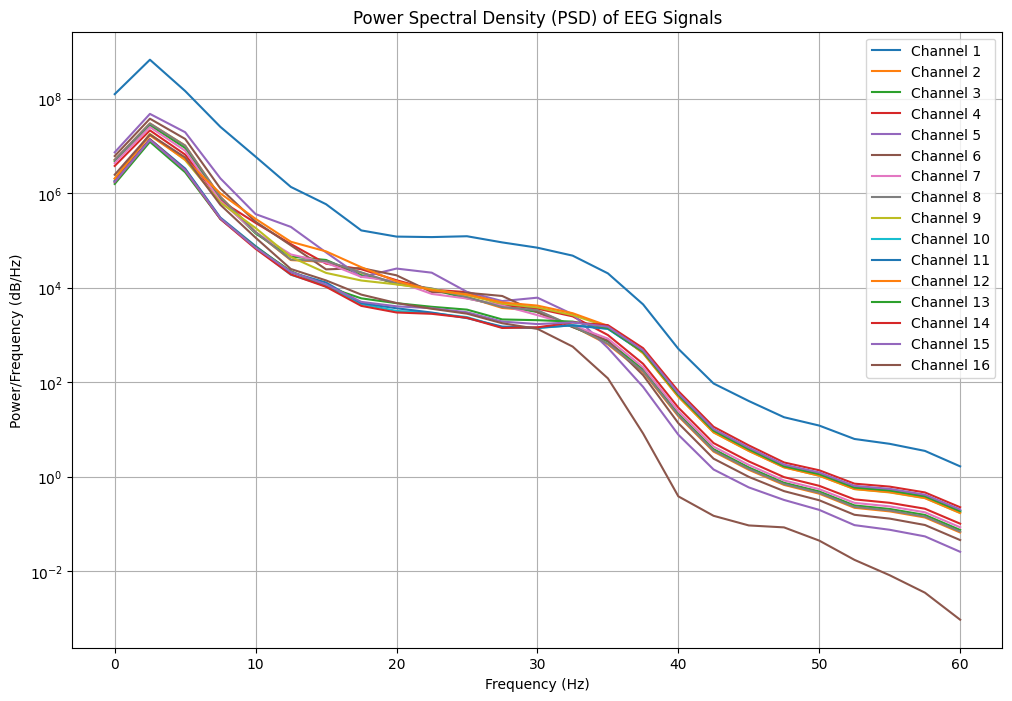

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

data = epochs.get_data(copy=True)
sfreq = epochs.info['sfreq']
n_epochs, n_channels, n_time_points = data.shape

plt.figure(figsize=(12, 8))

for channel_idx in range(n_channels):
    freqs, psd = welch(data[:, channel_idx, :], fs=sfreq, axis=-1)
    
    avg_psd = np.mean(psd, axis=0)
    
    plt.semilogy(freqs, avg_psd, label=f'Channel {channel_idx + 1}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density (PSD) of EEG Signals')
plt.legend()
plt.grid(True)
plt.show()


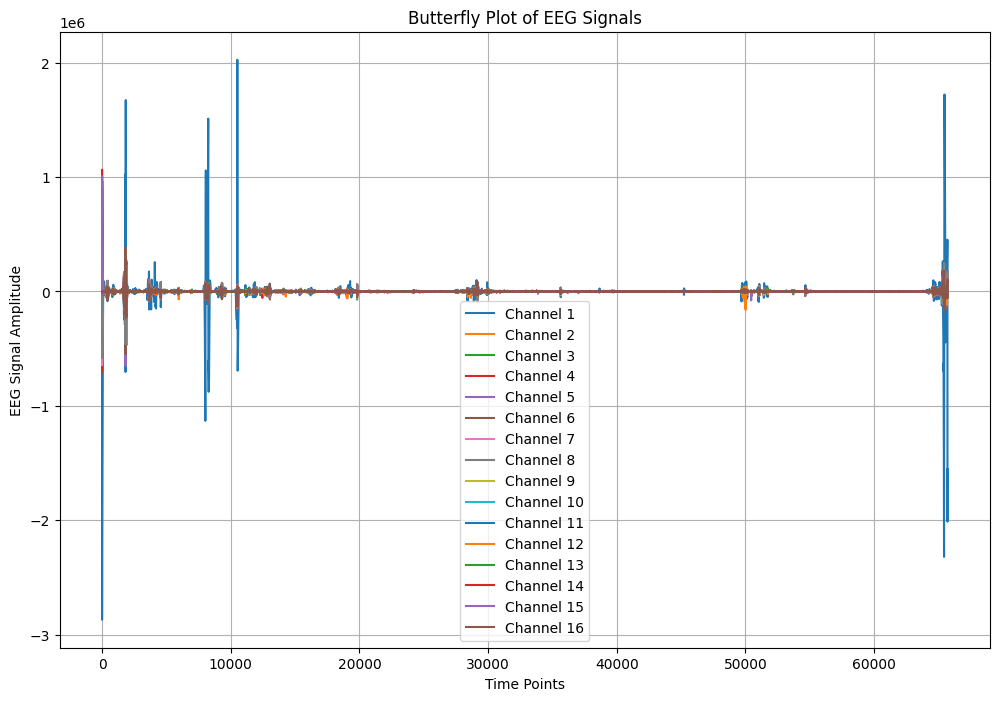

In [84]:
data = epochs.get_data(copy=True) 
n_epochs, n_channels, n_time_points = data.shape
plt.figure(figsize=(12, 8))

for channel_idx in range(n_channels):
    channel_data = data[:, channel_idx, :].flatten()
    time_points = np.arange(n_time_points * n_epochs)
    plt.plot(time_points, channel_data, label=f'Channel {channel_idx + 1}')


plt.xlabel('Time Points')
plt.ylabel('EEG Signal Amplitude')
plt.title('Butterfly Plot of EEG Signals')
plt.legend()
plt.grid(True)
plt.show()


In [85]:
import mne

eeg_data = epochs.get_data()

condition_ranges = {'lev1': (100/duration, 200/duration),
                    'lev2': (280/duration, 380/duration),
                    'lev3': (420/duration, 520/duration)}

epochs_by_condition = {}
selected_epochs = []

for condition, (start_epoch, end_epoch) in condition_ranges.items():
    start_epoch = int(start_epoch)
    end_epoch = int(end_epoch)
    condition_epochs = epochs[start_epoch:end_epoch+1].copy()
    epochs_by_condition[condition] = condition_epochs
    selected_epochs.append(condition_epochs)

selected_epochs = mne.concatenate_epochs(selected_epochs)

for condition, epoch_data in epochs_by_condition.items():
    num_epochs = len(epoch_data)
    print(f"Number of epochs for {condition}: {num_epochs}")

print(f"Total number of selected epochs: {len(selected_epochs)}")


Not setting metadata
753 matching events found
No baseline correction applied
Number of epochs for lev1: 251
Number of epochs for lev2: 251
Number of epochs for lev3: 251
Total number of selected epochs: 753


C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\776002152.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()


In [86]:

condition_of_interest = 'lev1'
epoch_array_for_condition = epochs_by_condition[condition_of_interest]
print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


Epoch array shape for condition lev1: (251, 16, 48)


C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1489624503.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


In [87]:
condition_of_interest = 'lev1'
epoch_array_for_condition = epochs_by_condition[condition_of_interest]

In [88]:
import pandas as pd
import numpy as np
from scipy.signal import welch



def calculate_psd_features(epoch_data, sfreq):
    psd_frequencies, psd_values = welch(epoch_data, fs=sfreq)
    psd_means = np.mean(psd_values, axis=1)  # Calculate mean PSD values for each channel
    psd_variances = np.var(psd_values, axis=1)  # Calculate variance of PSD values for each channel
    psd_std_devs = np.std(psd_values, axis=1)  # Calculate standard deviation of PSD values for each channel

    freq_min = 14
    freq_max = 30

    # Find the indices corresponding to the frequency range of interest
    idx_min = np.argmax(psd_frequencies > freq_min) - 1
    idx_max = np.argmax(psd_frequencies > freq_max)

    # Extract the PSD within the specified frequency range
    psd_values_alpha_band = psd_values[:, idx_min:idx_max]
    psd_means_alpha_band = np.mean(psd_values_alpha_band, axis=1)  # Calculate mean PSD values in alpha band for each channel
    psd_variances_alpha_band = np.var(psd_values_alpha_band, axis=1)  # Calculate variance of PSD values in alpha band for each channel
    psd_std_devs_alpha_band = np.std(psd_values_alpha_band, axis=1)  # Calculate standard deviation of PSD values in alpha band for each channel
    return psd_means_alpha_band, psd_variances_alpha_band, psd_std_devs_alpha_band

channel_names = epochs.ch_names
sfreq = epochs.info['sfreq']  # Sampling frequency

columns = [f'{feature}_{channel}' for feature in ['mean_psd', 'variance_psd', 'standarddev_psd'] for channel in channel_names]
columns.append('condition')
feature_df = pd.DataFrame(columns=columns)

def append_epoch_data(epoch_array, condition_label):
    global feature_df
    for epoch in epoch_array:
        psd_means, psd_variances, psd_std_devs = calculate_psd_features(epoch, sfreq)
        epoch_features = np.concatenate([psd_means, psd_variances, psd_std_devs])
        epoch_features = np.append(epoch_features, condition_label)
        epoch_df = pd.DataFrame([epoch_features], columns=columns)
        feature_df = pd.concat([feature_df, epoch_df], ignore_index=True)

append_epoch_data(epochs_by_condition['lev1'], 'lev1')
append_epoch_data(epochs_by_condition['lev2'], 'lev2')
append_epoch_data(epochs_by_condition['lev3'], 'lev3')

print("Shape of feature DataFrame:", feature_df.shape)
print(feature_df.head())


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 48, using nperseg = 48
  warnings.warn('nperseg = {0:d} is greater than input length '


Shape of feature DataFrame: (753, 49)
         mean_psd_Fp1       mean_psd_Fp2        mean_psd_C3  \
0   62782.67789340773  35937.42875440484  35840.72596893027   
1   4206.813288113464  5460.140481234594  5630.143216074541   
2  1736.6645912306049  853.5267819253568   795.771117239407   
3  1833.3348601795417  880.4317396955083  745.2428214088678   
4   721.9090523299967  456.3149275557944  517.5928731860567   

          mean_psd_C4        mean_psd_P7         mean_psd_P8  \
0  35003.524918141135  33062.72141704893   35895.15749379567   
1   5457.401361629418  4989.913370022484   5131.378157570173   
2   871.0994306519308  915.2844972824753   906.8816965178287   
3   706.1563059731028  770.3712957309396    842.321931315269   
4   330.8520508171122  391.1232862677541  478.32891271373444   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  35201.790307091986   36547.29374096745   43540.15823912833   
1  5079.0985093213085   5486.230779919486  3985.3900424702333   
2  

In [89]:
# Rename columns using a dictionary
new_column_names = {
    'mean_psd_Fp1': 'mean_psd_Fp1',
    'mean_psd_Fp2': 'mean_psd_Fp2',
    'mean_psd_C3': 'mean_psd_C3',
    'mean_psd_C4': 'mean_psd_C4',
    'mean_psd_P7': 'mean_psd_P7',
    'mean_psd_P8': 'mean_psd_P8',
    'mean_psd_O1': 'mean_psd_O1',
    'mean_psd_O2': 'mean_psd_O2',
    'mean_psd_F7': 'mean_psd_F7',
    'mean_psd_F8': 'mean_psd_F8',
    'standarddev_psd_Fp1': 'stddev_psd_Fp1',
    'standarddev_psd_Fp2': 'stddev_psd_Fp2',
    'standarddev_psd_C3': 'stddev_psd_C3',
    'standarddev_psd_C4': 'stddev_psd_C4',
    'standarddev_psd_P7': 'stddev_psd_P7',
    'standarddev_psd_P8': 'stddev_psd_P8',
    'standarddev_psd_O1': 'stddev_psd_O1',
    'standarddev_psd_O2': 'stddev_psd_O2',
    'standarddev_psd_F7': 'stddev_psd_F7',
    'standarddev_psd_F8': 'stddev_psd_F8'
}

# Rename columns using the rename() method
feature_df.rename(columns=new_column_names, inplace=True)

# Print the DataFrame
print(feature_df.head())


         mean_psd_Fp1       mean_psd_Fp2        mean_psd_C3  \
0   62782.67789340773  35937.42875440484  35840.72596893027   
1   4206.813288113464  5460.140481234594  5630.143216074541   
2  1736.6645912306049  853.5267819253568   795.771117239407   
3  1833.3348601795417  880.4317396955083  745.2428214088678   
4   721.9090523299967  456.3149275557944  517.5928731860567   

          mean_psd_C4        mean_psd_P7         mean_psd_P8  \
0  35003.524918141135  33062.72141704893   35895.15749379567   
1   5457.401361629418  4989.913370022484   5131.378157570173   
2   871.0994306519308  915.2844972824753   906.8816965178287   
3   706.1563059731028  770.3712957309396    842.321931315269   
4   330.8520508171122  391.1232862677541  478.32891271373444   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  35201.790307091986   36547.29374096745   43540.15823912833   
1  5079.0985093213085   5486.230779919486  3985.3900424702333   
2   914.6841367382726  1040.0261429330208

In [90]:
feature_df

mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0     62782.67789340773   35937.42875440484   35840.72596893027   
1     4206.813288113464   5460.140481234594   5630.143216074541   
2    1736.6645912306049   853.5267819253568    795.771117239407   
3    1833.3348601795417   880.4317396955083   745.2428214088678   
4     721.9090523299967   456.3149275557944   517.5928731860567   
..                  ...                 ...                 ...   
748    862.211759016275   330.7524552309401  367.10942796879505   
749  463.89023405251754  387.16198198639154   298.9603407048188   
750   1562.697747833477    644.537688043137    570.265166914454   
751  1095.4749261992883  326.19936552103746   435.1779031181142   
752   869.3572002763601  321.61611377027293   352.1888475625677   

            mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0    35003.524918141135   33062.72141704893   35895.15749379567   
1     5457.401361629418   4989.913370022484   5131.378157570173   
2     871.0994306519308   915.2844972824753   906.8816965178287   
3     706.1563059731028   770.3712957309396    842.321931315269   
4     330.8520508171122   391.1232862677541  478.32891271373444   
..                  ...                 ...                 ...   
748   533.5355216926456  392.46036918394447  394.30528575482236   
749   466.0570287599719   244.9360963479158   335.2146263894791   
750   892.5833307821761   851.7502696926103    722.917742629574   
751   509.8497208755959   390.6111428729546  383.44616291916674   
752  425.89242375564027  413.12195059292355  296.80237832454253   

            mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0    35201.790307091986   36547.29374096745   43540.15823912833   
1    5079.0985093213085   5486.230779919486  3985.3900424702333   
2     914.6841367382726  1040.0261429330208  2229.7651327920485   
3     754.9898787178436   981.0910453538024  1771.8324686249837   
4     386.7099222098743  312.54728269441193  1458.3574207306378   
..                  ...                 ...                 ...   
748   414.3998340120908   355.5613232613533  1681.2406192743686   
749   448.7990002939425  367.36337018857245   971.8537292561202   
750    821.562459443844    914.366313388285  1966.5497787536722   
751     480.03713198551  269.91858956564306   1155.743635906706   
752  359.93477586694075   296.0936321313279   737.1935296155468   

            mean_psd_F8  ...       stddev_psd_O2       stddev_psd_F7  \
0    13271.458541485592  ...  31509.104348398636  30727.582077724204   
1    2766.1919819040622  ...   4451.983931352129  3188.3070810654845   
2     308.5045226237185  ...    792.185236574795  2108.6111772031622   
3    347.68961717175245  ...  1078.5207840864718  1620.8290814106526   
4    151.84890108945956  ...   267.8980268717763  1175.7516764900286   
..                  ...  ...                 ...                 ...   
748   131.8636647400206  ...   315.3564398112204  1231.9706713266187   
749    81.1639682013161  ...   390.3544364064149   784.9262582376124   
750   268.2715599527526  ...   947.3472387380677   1569.546336309469   
751  127.92259694248298  ...  209.95519984830068   745.1005793196482   
752   183.7462941907317  ...   319.2431614056814   461.4065306532165   

          stddev_psd_F8  standarddev_psd_F3  standarddev_psd_F4  \
0    13852.922761785983  12036.373859231142  20191.392494402517   
1    2342.0762489558747  2765.2915425959854   3397.832307180441   
2    171.78521455430484  215.87740807466585   385.2932797460134   
3     358.9729502334217   333.7740094885005   736.4251894851224   
4     80.94850252093018  103.09569168307026   722.0924521978519   
..                  ...                 ...                 ...   
748  123.81057779331076  121.97439099775139  257.38157300212043   
749   93.08139382038762  158.75653583277662    423.435758137977   
750  254.00949957391785  167.86485233181133   773.1820907270118   
751  141.08346334080863   160.0688267744634   261.00017193044

In [91]:
# import matplotlib.pyplot as plt

# def plot_psd_features(psd_features, freqs, ch_names):
#     num_channels = len(ch_names)
    
#     fig, axs = plt.subplots(num_channels, figsize=(10, 6*num_channels))
#     for i, (channel_psd, channel_name) in enumerate(zip(psd_features, ch_names)):
#         axs[i].plot(freqs, channel_psd, label=channel_name)
#         axs[i].set_title(f'Power Spectral Density (PSD) for Channel {channel_name}')
#         axs[i].set_xlabel('Frequency (Hz)')
#         axs[i].set_ylabel('PSD')
#         axs[i].grid(True)
#         axs[i].legend()

#     plt.tight_layout()
#     plt.show()

# psd_frequencies, psd_values = welch(epoch_data[0], fs=sfreq)

# # Example usage:
# plot_psd_features(psd_values,  psd_frequencies, ch_names


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = feature_df.drop(columns=['condition'])
y = feature_df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5761589403973509


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifier on the training data
log_reg_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = log_reg_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.33112582781456956


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X = feature_df.drop(columns=['condition'])
y = feature_df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4900662251655629


Not setting metadata
10954 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 10954 events and 6 original time points ...
0 bad epochs dropped
Not setting metadata
6003 matching events found
No baseline correction applied
Number of epochs for lev1: 2001
Number of epochs for lev2: 2001
Number of epochs for lev3: 2001
Total number of selected epochs: 6003
Epoch array shape for condition lev1: (2001, 16, 6)


c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 6, using nperseg = 6
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 6, using nperseg = 6
  w

Shape of feature DataFrame: (6003, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   6773.188347646537   37317.73464243344   39606.57468002451   
1  134156.68245362607  137457.91512821117   138307.9307323868   
2   963.3036933167626   6691.694380203335   6512.618529717942   
3   7520.636647218591  10530.025519291272  10167.430627181326   
4  2326.5325020352766   76.09314824102077   173.8643205454834   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   41631.98046339432  39203.339634171374  35688.960712141656   
1  141640.80718859436   136935.0768678707  139098.48954421902   
2   6911.443661765466   7572.302505296377   6571.210520683747   
3   9998.754608922884  10942.772503493663  10629.483025275611   
4  232.51354951416334   252.2966945973474   153.6347623480089   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  40489.436219461764   38519.17865998316  31011.886998212394   
1  141302.56827224867  142338.12513971722   87708

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 12, using nperseg = 12
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 12, using nperseg = 12

Shape of feature DataFrame: (3003, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  503951.69792913646  452909.98765273386  468690.18287443434   
1   41828.83475170047   34273.17952455146   34246.25131612039   
2  3778.9865045604006   7917.977279809323  6823.0676878096065   
3   854187.9080915301    504535.744272746  495484.03640601225   
4  50917.780109759035  10980.636644123091  11076.191468002573   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   466691.5122474046   468052.2977650817    461617.829601991   
1   30504.88345484258   34491.63169751416  31575.467492405824   
2   7637.859884743884      8051.663641386   6966.022475403384   
3  494325.82877149904   469765.6220979323  498833.56704511284   
4  10874.873087719561  11160.438415947641  12139.028273820804   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  450499.73900975805   459690.2678057985   323366.6446097735   
1   35790.17911424264  31043.821960397578  22236.

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 24, using nperseg = 24
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 24, using nperseg = 24

Number of epochs for lev1: 501
Number of epochs for lev2: 501
Number of epochs for lev3: 501
Total number of selected epochs: 1503
Epoch array shape for condition lev1: (501, 16, 24)
Shape of feature DataFrame: (1503, 49)
         mean_psd_Fp1        mean_psd_Fp2        mean_psd_C3  \
0  103768.04572902653   83966.66258297877  86231.56008292451   
1  1555550.6028497326   635146.1042813708  631082.3348490458   
2   60704.61751855225  14472.104684385262  15251.63752646854   
3   13388.85443296185    8837.40955323524   8864.78711142569   
4   5041.621994548716   8523.442046403523  8106.615905061702   

         mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  89789.79236165977   80428.12326871403   86836.01379734883   
1  613083.5385205603   594065.8628956047   627618.9099368915   
2  16109.04209327057  12866.146749293184  12354.094701394157   
3  9418.962781413813   7975.584864769233   8478.913802159677   
4  7189.315305772376   8445.174573689608   9410.746325281409   

        

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 36, using nperseg = 36
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 36, using nperseg = 36

Number of epochs for lev1: 334
Number of epochs for lev2: 334
Number of epochs for lev3: 334
Total number of selected epochs: 1002
Epoch array shape for condition lev1: (334, 16, 36)
Shape of feature DataFrame: (1002, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  63071.012893925385  10834.874859650832  10230.289446939973   
1   625066.2191427671  287031.03878792917   283956.3974255418   
2   5329.493043930641   6993.696714709476   7164.874256186985   
3   2226.070577696378  1014.8313166844977   970.1068543125439   
4   758.0302470030384   659.0341190783562   616.1093728872685   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  10083.850778883889  11398.782909567492  11283.640814345474   
1  274588.16477721295  265545.02246246114    284092.739593261   
2   7160.077334198085   6524.782617004486   6831.080659388961   
3   994.1133377333718  1218.2513845725055  1145.9193262540362   
4   800.3349569081056   723.8023735086326   818.7459618323095 

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 48, using nperseg = 48
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 48, using nperseg = 48

Shape of feature DataFrame: (753, 49)
         mean_psd_Fp1       mean_psd_Fp2        mean_psd_C3  \
0   62782.67789340773  35937.42875440484  35840.72596893027   
1   4206.813288113464  5460.140481234594  5630.143216074541   
2  1736.6645912306049  853.5267819253568   795.771117239407   
3  1833.3348601795417  880.4317396955083  745.2428214088678   
4   721.9090523299967  456.3149275557944  517.5928731860567   

          mean_psd_C4        mean_psd_P7         mean_psd_P8  \
0  35003.524918141135  33062.72141704893   35895.15749379567   
1   5457.401361629418  4989.913370022484   5131.378157570173   
2   871.0994306519308  915.2844972824753   906.8816965178287   
3   706.1563059731028  770.3712957309396    842.321931315269   
4   330.8520508171122  391.1232862677541  478.32891271373444   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  35201.790307091986   36547.29374096745   43540.15823912833   
1  5079.0985093213085   5486.230779919486  3985.3900424702333   
2  

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 60, using nperseg = 60
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 60, using nperseg = 60

Shape of feature DataFrame: (603, 49)
         mean_psd_Fp1        mean_psd_Fp2        mean_psd_C3  \
0  247275.86971963616  118402.55154916827   117713.926305661   
1   2292.963132255355  2610.5800005388937  2702.982171074169   
2   993.5125243722717   586.3969294143469  478.1383269417942   
3   828.4102889103997   558.9488475956484  646.5411216917406   
4  59461.105020830924   49647.77311297288  50160.99910463321   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   113121.8977656739  109241.87874397541   117020.3881866737   
1  2801.7580025248617   2272.882462796338  2545.5544149262337   
2   658.5828707610549   583.0105725881772   687.2960668853023   
3    449.747862392484  490.26320619146713   523.7413870005271   
4   49011.31541490515   48464.00232604591   48080.19532795143   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  118562.16428626498  120121.03215921114  170130.26443352335   
1  2272.9848609159353  2875.1701981736146   3268.5990183

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 72, using nperseg = 72
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 72, using nperseg = 72

Shape of feature DataFrame: (503, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  10236.055366543536  1302.8767599373261  1506.6463144966265   
1   60395.50604614655  27020.644349641403  26919.745984027755   
2  1680.7412656198312  1123.4053132852373   971.8896181764911   
3  1150.6775517643614   563.5428783937252    638.777801595474   
4  126657.41417122204    74511.1287415105   74853.24621446904   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  1355.6419664577932  1250.7544244113608  1270.7631330723007   
1   25604.23479504632   24564.49298757131  26119.745429521987   
2  1032.6716801163352  1113.4273706577371  1184.5187134590967   
3   454.5012856751588   543.5552931935325   514.9885685695518   
4   72457.57731928084   73149.48770905726   71709.78398301791   

          mean_psd_O1         mean_psd_O2        mean_psd_F7  \
0   1141.853205683497   1316.118806843716  1802.127460140465   
1  27127.538198758677  26798.704824641776  37519.447

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 84, using nperseg = 84
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 84, using nperseg = 84

Shape of feature DataFrame: (430, 49)
         mean_psd_Fp1       mean_psd_Fp2        mean_psd_C3  \
0   9879.749015143518  2544.040084653715   2654.81541864816   
1  167889.75981356372  76493.10270302178   75931.3968274635   
2  1436.9375725762277  954.4847771357565  818.8921453746577   
3  1829.5006636075223    810.37535980802  905.1850600908155   
4   84694.40588264751  18848.60458662597  18199.26862338865   

         mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  2384.092082149805  2343.2675933254254  2308.8371011536533   
1  72612.87284233818   70095.05861486458    75169.1344453494   
2  894.7434474740086    940.220709663487  1031.0324816012378   
3  628.1718300662886   671.4017498053255   730.8958403052952   
4  18488.92288253399  18036.102280350744   17429.38562447299   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  2841.1437389290854   2868.553343849592  3868.3137042249164   
1   76714.94219793237   76575.95884888616  109600.58722736019   
2  

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 96, using nperseg = 96
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 96, using nperseg = 96

Shape of feature DataFrame: (378, 49)
         mean_psd_Fp1       mean_psd_Fp2         mean_psd_C3  \
0  209280.80103769086  98550.99481775178   97992.92015399376   
1   1413.831362759192  896.2862805982601    757.464260027172   
2   4661.596154056851  5643.306611650224   5595.561243212601   
3   8715.322600190751  6952.739921779056  6637.2428588412195   
4  3224.3223880531764  7428.419682415215   7206.453386759224   

         mean_psd_C4        mean_psd_P7        mean_psd_P8        mean_psd_O1  \
0  94244.29024341721  90994.86688457067  96922.50096621664  98876.15278811571   
1  880.2331823274684   864.768109054141  977.6551733092895  957.1610952401722   
2  5448.126441131261  4610.286779413198  5169.745444615651  5201.607418024613   
3  6951.453717138327  7421.569720978449  6657.118218911972  6909.066776291549   
4  133885.9888313823   8261.54849310096  7560.714851471354  7946.779790686427   

          mean_psd_O2         mean_psd_F7         mean_psd_F8  ...  \
0   99331.3302314877

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 108, using nperseg = 108
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 108, using nperseg =

Shape of feature DataFrame: (336, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  227040.74504267814  106740.96351287796  106067.56894815195   
1  1445.9166747336958   871.3257312950666   737.0715947564829   
2  35315.137586033154  30147.557668677342  30291.311036184474   
3   7006.345901685672  8049.3709126316135   8116.170768287831   
4  14354.835429083374  13694.782322537627    14320.6706443133   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   101823.7195962258   98343.29339412387   105136.3858128774   
1    846.097416798426   802.6204300141821   948.2558870380657   
2  29635.599486711057  28124.858480099174  28766.248900819748   
3  11624.459202846723   8039.772549216919   8055.737647957471   
4    66421.0403434271  13466.320811244233  13760.997390910325   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  107063.82264779495  107659.92849483488  154581.91370844998   
1   926.4820702812434   1126.110628503583   1955.7

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 120, using nperseg = 120
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 120, using nperseg =

Shape of feature DataFrame: (303, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  106889.76994806936   50642.99502568692   50460.33509927369   
1  1862.7003268802637   838.8081556657801   827.9363739758377   
2   46287.89431625923  21461.335004815224    21356.4326299867   
3   3410.535264155003   7241.590732122231    7074.26025859534   
4  3892.4302394850492  2282.2081620305553  2089.3220132722495   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   48732.84098024501   46995.92442108164   49730.12021543845   
1   688.4444638711409   770.7663453465153   888.8474321816664   
2   20454.43664315523   20760.11457112638  21203.990866799493   
3    86050.9529257317  7781.2055828611155   7207.220719665546   
4  2161.1972050917907  2016.0554368331664  2278.2969429944264   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   50644.67561236614   51161.49086446293   73583.11213575541   
1   859.2761876416442   982.1692435488546  1954.25

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 132, using nperseg = 132
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 132, using nperseg =

Shape of feature DataFrame: (276, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   36341.38804895545   3536.221211167571  3550.4157926420853   
1   29707.15479211065  15164.985656389246   15225.05146880035   
2  1839.6514815285693    990.117684975565  1046.3749939864567   
3   7874.775215692161  6702.3760751396185   6472.063490391815   
4  12159.712571907223  11613.045858629213  12078.793541439252   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  3432.7606477186564   3423.311922836628  3373.2525074023984   
1  14768.770565159342  13947.893021551665  14790.645287905738   
2   798.5922329487017   849.6593753508745   914.2753387429416   
3  7223.0303210768125   6987.682698231221    6506.53664992579   
4   67447.93388207613  11697.957103316781  11846.383079185824   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  3722.9453531441795  3742.2277106228585    8003.74301265543   
1  14953.209137918266  15382.438024610025  20535.0

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 144, using nperseg = 144
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 144, using nperseg =

Shape of feature DataFrame: (252, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0  147139.46754347545   66308.04179095084   65818.62539349122   
1  1717.9745605923501     890.37195872344   801.8277850657008   
2   43939.55949584184   17049.15708435507   16840.06780346543   
3   8294.528789926195   11369.64027440476   11758.49674546018   
4   7647.277174631522  3398.8778285422804  3575.1495025285762   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   63240.24310837094   61305.96470942632   65506.57109553056   
1   773.2402719352067   790.2794829454166   946.5325056727349   
2  16657.073498522346  16906.282353506132  16610.318982357654   
3  110786.49295483765  11980.930941743367  11584.638329802267   
4  3883.6967840515094   3482.734975094666   3338.696834528767   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   66575.53298894201   67140.80175934576   94948.32365329601   
1   920.0683376465134  1095.7597865631537    2025.

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 156, using nperseg = 156
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 156, using nperseg =

Shape of feature DataFrame: (234, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   29553.72689044463  2500.5850796712125  2523.0023382640593   
1  14963.516663748771   7985.255436563043   8096.202840058512   
2   21990.84434709253  15891.434612439783  15863.285617373507   
3   4191.917876047874   7697.744178717848   7754.706912691866   
4  7063.6903070718545   2373.901827234425  2260.4698837238284   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   2443.354464421812  2470.1370440787105   2344.723756047324   
1   7908.669706130229   7410.356565756598   7798.810032249946   
2   15381.80083534833  14438.306704214388  15072.208302653687   
3  46492.649771768025    8063.65167326915   7653.325265378048   
4   2258.370267137997  2244.4092722135833  2476.2191230039152   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   2534.092526778034   2538.056789281802   5894.904505096097   
1  7719.5250171317075   8226.918632606086  11587.2

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 168, using nperseg = 168
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 168, using nperseg =

Shape of feature DataFrame: (216, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0    93996.6785752437   41490.23691408388  41195.403713862914   
1  1738.5524484512978   831.9182944846921   805.7364316303847   
2   7911.070152960907   7034.815560877764   6907.626652274174   
3   6035.320738493411   6804.024875150226   6579.658748121549   
4   48736.08794397736  15072.416570128378  15023.859546297224   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   39594.79415393866  38465.425505853855   41029.47263879337   
1   703.4322481392177   753.9470209407788   869.5721295136558   
2   9077.764271278282   7263.782112751743   6943.919550487934   
3   9569.692486851825    5800.00346354368  6678.4570238489205   
4  15049.965685951922  15103.764366928262  14962.058398945703   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  41766.851396297854   42134.75674138487   59529.31056601057   
1   855.4927341085659   959.9581534925273  1962.87

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 180, using nperseg = 180
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 180, using nperseg =

Shape of feature DataFrame: (203, 49)
         mean_psd_Fp1       mean_psd_Fp2         mean_psd_C3  \
0  18902.108688658718   2941.23962861491   3103.243943392787   
1  1744.0876731493584  991.2105438114768   888.7395865979627   
2  14560.162480050365  9605.434813738479   9436.220112929223   
3   7126.774111153408   6740.87796997199   6606.537164181069   
4   36233.87558492046  13995.23668480913  14048.930146657445   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  2852.7625243928196  2864.9924278509357  2849.6642813718913   
1   941.9381943978857   941.4430217243588  1058.9788208112034   
2   9701.094882347665   9764.490282342738   9557.548938618447   
3  14632.588588312774   5989.388812227034   6707.355134429493   
4   13963.47373177921  14116.469144315395  13929.117281083081   

          mean_psd_O1         mean_psd_O2        mean_psd_F7  \
0  3121.7064148049126   3160.471388288034  5109.971567452038   
1  1024.8083870409705  1217.4576699643849  2334.6644049729

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg = 240
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 240, using nperseg =

Shape of feature DataFrame: (153, 49)
        mean_psd_Fp1       mean_psd_Fp2         mean_psd_C3  \
0  7744.550256046973  4143.810573899253   4144.090652736024   
1  8078.443068123091  8218.859921717778    8180.06472822311   
2  9075.054809036646  3941.346753597788   4029.191476943146   
3  5390.280804310407  2398.084771364172  2460.3465541826304   
4  23879.75071086526  6388.930414265424   5879.561539183234   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0  4095.7975507158553  3927.3700473918493   4107.612847343416   
1  16908.025742152528   8394.893104005669  8122.3495322678145   
2   4509.991526175576  4091.2701170082128  3916.7906735839933   
3   2673.550830828177   2499.082793782983  2484.6586524204026   
4   8671.108930339265    7056.14881488905   6959.809934430252   

         mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0  4029.651239117445   4364.646978546118   6959.549744508342   
1  8165.483859373073   8139.064957908584   7101.029567398988   


C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:47: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  eeg_data = epochs.get_data()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_19792\1195440527.py:74: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")


Shape of feature DataFrame: (102, 49)
         mean_psd_Fp1        mean_psd_Fp2         mean_psd_C3  \
0   82555.02773682674   35492.58383233192   35244.18153085405   
1   8106.179903103406   8089.451293620102   8067.585986770987   
2   32955.95443364429    8190.34787441263   8260.197742204604   
3   26128.08403826946   6496.729997696901   6052.762489917216   
4  5780.6825368955215  3451.8187079025015  3410.2101010004185   

          mean_psd_C4         mean_psd_P7         mean_psd_P8  \
0   33920.70027302083   32915.90681493702   35002.71948543738   
1  23887.769356596444   8339.887867340709   8039.616358789077   
2   8035.414973722326   8394.729255129354   8344.188004071873   
3    8549.58990380096   7133.789279539748   6894.688461638924   
4   4185.578815418573  3205.0720948745293  3190.8876248599818   

          mean_psd_O1         mean_psd_O2         mean_psd_F7  \
0   35764.56137018438   36060.63060233058  51345.341981088575   
1   8080.919422238211  8047.9036717440695   7262.4

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

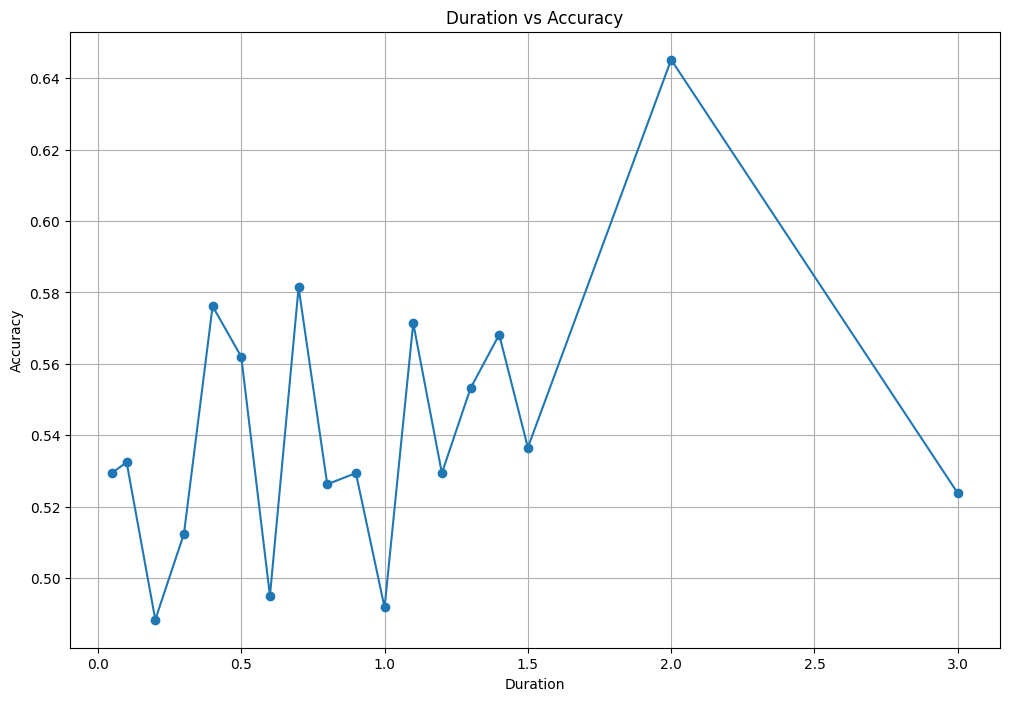

0.6451612903225806


In [95]:
import matplotlib.pyplot as plt

# Initialize lists to store durations and accuracies
durations = []
accuracies = []

# Define a range of durations to try
duration_range = [0.05,0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,2,3]

maxacc = 0

for duration in duration_range:
    epochs=mne.make_fixed_length_epochs(raw_ica, duration = duration, overlap=0,preload=True)
    epochs.drop_bad()  # This will drop bad epochs
    num_epochs = len(epochs)
    
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.signal import welch

    data = epochs.get_data(copy=True)
    sfreq = epochs.info['sfreq']
    n_epochs, n_channels, n_time_points = data.shape

    

    for channel_idx in range(n_channels):
        freqs, psd = welch(data[:, channel_idx, :], fs=sfreq, axis=-1)
        
        avg_psd = np.mean(psd, axis=0)
        
        

    data = epochs.get_data(copy=True) 
    n_epochs, n_channels, n_time_points = data.shape
    plt.figure(figsize=(12, 8))

    for channel_idx in range(n_channels):
        channel_data = data[:, channel_idx, :].flatten()
        time_points = np.arange(n_time_points * n_epochs)
        


    
    import mne

    eeg_data = epochs.get_data()

    condition_ranges = {'lev1': (100/duration, 200/duration),
                        'lev2': (280/duration, 380/duration),
                        'lev3': (420/duration, 520/duration)}

    epochs_by_condition = {}
    selected_epochs = []

    for condition, (start_epoch, end_epoch) in condition_ranges.items():
        start_epoch = int(start_epoch)
        end_epoch = int(end_epoch)
        condition_epochs = epochs[start_epoch:end_epoch+1].copy()
        epochs_by_condition[condition] = condition_epochs
        selected_epochs.append(condition_epochs)

    selected_epochs = mne.concatenate_epochs(selected_epochs)

    for condition, epoch_data in epochs_by_condition.items():
        num_epochs = len(epoch_data)
        print(f"Number of epochs for {condition}: {num_epochs}")

    print(f"Total number of selected epochs: {len(selected_epochs)}")


    condition_of_interest = 'lev1'
    epoch_array_for_condition = epochs_by_condition[condition_of_interest]
    print(f"Epoch array shape for condition {condition_of_interest}: {epoch_array_for_condition.get_data().shape}")

    condition_of_interest = 'lev1'
    epoch_array_for_condition = epochs_by_condition[condition_of_interest]
    import pandas as pd
    import numpy as np
    from scipy.signal import welch



    def calculate_psd_features(epoch_data, sfreq):
        psd_frequencies, psd_values = welch(epoch_data, fs=sfreq)
        psd_means = np.mean(psd_values, axis=1)  # Calculate mean PSD values for each channel
        psd_variances = np.var(psd_values, axis=1)  # Calculate variance of PSD values for each channel
        psd_std_devs = np.std(psd_values, axis=1)  # Calculate standard deviation of PSD values for each channel

        freq_min = 14
        freq_max = 30

        # Find the indices corresponding to the frequency range of interest
        idx_min = np.argmax(psd_frequencies > freq_min) - 1
        idx_max = np.argmax(psd_frequencies > freq_max)

        # Extract the PSD within the specified frequency range
        psd_values_alpha_band = psd_values[:, idx_min:idx_max]
        psd_means_alpha_band = np.mean(psd_values_alpha_band, axis=1)  # Calculate mean PSD values in alpha band for each channel
        psd_variances_alpha_band = np.var(psd_values_alpha_band, axis=1)  # Calculate variance of PSD values in alpha band for each channel
        psd_std_devs_alpha_band = np.std(psd_values_alpha_band, axis=1)  # Calculate standard deviation of PSD values in alpha band for each channel
        return psd_means_alpha_band, psd_variances_alpha_band, psd_std_devs_alpha_band

    channel_names = epochs.ch_names
    sfreq = epochs.info['sfreq']  # Sampling frequency

    columns = [f'{feature}_{channel}' for feature in ['mean_psd', 'variance_psd', 'standarddev_psd'] for channel in channel_names]
    columns.append('condition')
    feature_df = pd.DataFrame(columns=columns)

    def append_epoch_data(epoch_array, condition_label):
        global feature_df
        for epoch in epoch_array:
            psd_means, psd_variances, psd_std_devs = calculate_psd_features(epoch, sfreq)
            epoch_features = np.concatenate([psd_means, psd_variances, psd_std_devs])
            epoch_features = np.append(epoch_features, condition_label)
            epoch_df = pd.DataFrame([epoch_features], columns=columns)
            feature_df = pd.concat([feature_df, epoch_df], ignore_index=True)

    append_epoch_data(epochs_by_condition['lev1'], 'lev1')
    append_epoch_data(epochs_by_condition['lev2'], 'lev2')
    append_epoch_data(epochs_by_condition['lev3'], 'lev3')

    print("Shape of feature DataFrame:", feature_df.shape)
    print(feature_df.head())

    # Rename columns using a dictionary
    new_column_names = {
        'mean_psd_Fp1': 'mean_psd_Fp1',
        'mean_psd_Fp2': 'mean_psd_Fp2',
        'mean_psd_C3': 'mean_psd_C3',
        'mean_psd_C4': 'mean_psd_C4',
        'mean_psd_P7': 'mean_psd_P7',
        'mean_psd_P8': 'mean_psd_P8',
        'mean_psd_O1': 'mean_psd_O1',
        'mean_psd_O2': 'mean_psd_O2',
        'mean_psd_F7': 'mean_psd_F7',
        'mean_psd_F8': 'mean_psd_F8',
        'standarddev_psd_Fp1': 'stddev_psd_Fp1',
        'standarddev_psd_Fp2': 'stddev_psd_Fp2',
        'standarddev_psd_C3': 'stddev_psd_C3',
        'standarddev_psd_C4': 'stddev_psd_C4',
        'standarddev_psd_P7': 'stddev_psd_P7',
        'standarddev_psd_P8': 'stddev_psd_P8',
        'standarddev_psd_O1': 'stddev_psd_O1',
        'standarddev_psd_O2': 'stddev_psd_O2',
        'standarddev_psd_F7': 'stddev_psd_F7',
        'standarddev_psd_F8': 'stddev_psd_F8'
    }

    # Rename columns using the rename() method
    feature_df.rename(columns=new_column_names, inplace=True)
    # Train the classifier and calculate accuracy
    X = feature_df.drop(columns=['condition'])
    y = feature_df['condition']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append duration and accuracy to lists
    durations.append(duration)
    accuracies.append(accuracy)
    maxacc = max(maxacc , accuracy)

# Plot duration vs accuracy
plt.plot(durations, accuracies, marker='o')
plt.xlabel('Duration')
plt.ylabel('Accuracy')
plt.title('Duration vs Accuracy')
plt.grid(True)
plt.show()

print(maxacc)